In [11]:
from sklearn.datasets import load_diabetes

In [12]:
dataset = load_diabetes()

In [13]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [18]:
import pandas as pd
X = pd.DataFrame(data =  dataset['data'], columns = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
y = dataset['target']

In [21]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333


In [24]:
## correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

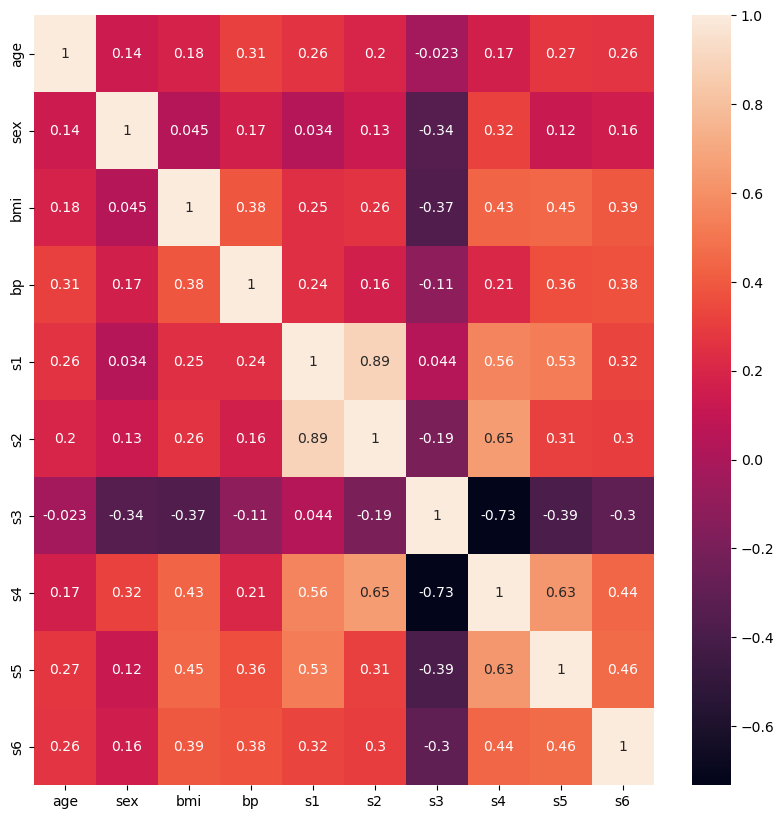

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True)

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [30]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## hyperparameter tuning

In [38]:
param = {
'criterion' : ['squared_error', 'friedman_mse', 'absolute_error,' 'poisson'],
'splitter' : ['best','random'],
'max_depth' : [1, 2 , 3 ,4 ,5, 10, 15, 20, 25],
'max_features' : ['auto','sqrt','log2']   
}

In [39]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error,poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid = GridSearchCV(regressor, param_grid = param, cv = 5, scoring = 'neg_mean_squared_error')

In [45]:

import warnings 
warnings.filterwarnings('ignore')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error,poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [46]:
y_pred = grid.predict(X_test)

In [51]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))

-0.25712077435452363
50.14393499005939
4201.111509468564


In [57]:
## to see how our selected model looks like
selected = DecisionTreeRegressor(criterion= 'friedman_mse',
 max_depth= 4,
 max_features= 'log2',
 splitter= 'best')

In [58]:
selected.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.5267857142857143, 0.9, 'x[7] <= -0.014\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.2857142857142857, 0.7, 'x[3] <= 0.027\nfriedman_mse = 3904.783\nsamples = 122\nvalue = 113.656'),
 Text(0.14285714285714285, 0.5, 'x[8] <= -0.019\nfriedman_mse = 2954.117\nsamples = 104\nvalue = 103.192'),
 Text(0.07142857142857142, 0.3, 'x[8] <= -0.044\nfriedman_mse = 1836.11\nsamples = 72\nvalue = 89.028'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 1439.199\nsamples = 38\nvalue = 80.105'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 2091.294\nsamples = 34\nvalue = 99.0'),
 Text(0.21428571428571427, 0.3, 'x[0] <= -0.085\nfriedman_mse = 4002.496\nsamples = 32\nvalue = 135.062'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 4224.222\nsamples = 3\nvalue = 212.333'),
 Text(0.25, 0.1, 'friedman_mse = 3297.995\nsamples = 29\nvalue = 127.069'),
 Text(0.42857142857142855, 0.5, 'x[5] <= -0.027\nfriedman_mse = 5110.099\nsamples = 18\nvalue = 174.111'),
 Text(0.35714285

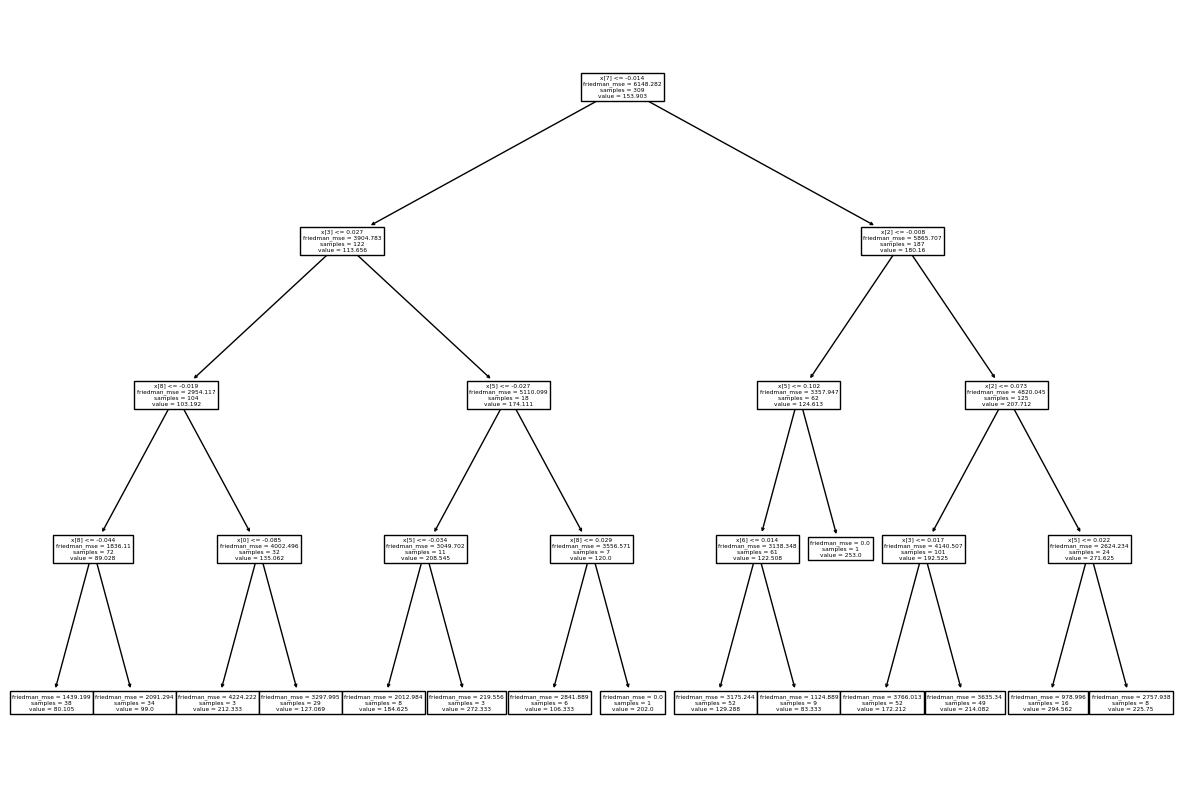

In [63]:
## visualize the model
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(selected)